# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
import ast
import matplotlib.patches as patches
import random
%matplotlib inline

In [16]:
parameters=dict({'a1_C12':0.200,'a1_err_C12':0.095,'a2_C12':0.025 ,'a2_err_C12':0.092,
                'b1_C12':0.595 ,'b1_err_C12':0.103,'b2_C12':-0.133,'b2_err_C12':0.107,
                'a1_Al27':0.140,'a1_err_Al27': 0.074,'a2_Al27':0.044 ,'a2_err_Al27':0.111,
                'b1_Al27':0.590 ,'b1_err_Al27':0.121,'b2_Al27':-0.103,'b2_err_Al27':0.127,
                'a1_Fe56':0.275 ,'a1_err_Fe56':0.037,'a2_Fe56':-0.021  ,'a2_err_Fe56':0.085,
                'b1_Fe56':0.611,'b1_err_Fe56':0.085,'b2_Fe56':-0.117,'b2_err_Fe56':0.054,
                'a1_Pb208':0.178,'a1_err_Pb208':0.089,'a2_Pb208':0.027 ,'a2_err_Pb208':0.100,
                'b1_Pb208':0.612,'b1_err_Pb208':0.094,'b2_Pb208':-0.127,'b2_err_Pb208':0.095})

In [22]:
p_miss = np.linspace(0.3,1,100)
sigma , mean = [] , []
sigma_down , sigma_up , mean_down, mean_up = [], [] , [] , []
for target in ['C12','Al27','Fe56','Pb208']:
    sigma_down.append((parameters['a1_%s'%target]-parameters['a1_err_%s'%target])*(p_miss-0.6) 
                      + parameters['a2_%s'%target]-parameters['a2_err_%s'%target])
    sigma.append(parameters['a1_%s'%target]*(p_miss-0.6) + parameters['a2_%s'%target])
    sigma_up.append((parameters['a1_%s'%target]+parameters['a1_err_%s'%target])*(p_miss-0.6) 
                      + parameters['a2_%s'%target]+parameters['a2_err_%s'%target])


    mean_down.append((parameters['b1_%s'%target]-parameters['b1_err_%s'%target])*(p_miss-0.6) 
                      + parameters['b2_%s'%target]-parameters['b2_err_%s'%target])
    mean.append(parameters['b1_%s'%target]*(p_miss-0.6) + parameters['b2_%s'%target])
    mean_up.append((parameters['b1_%s'%target]+parameters['b1_err_%s'%target])*(p_miss-0.6) 
                      + parameters['b2_%s'%target]+parameters['b2_err_%s'%target])



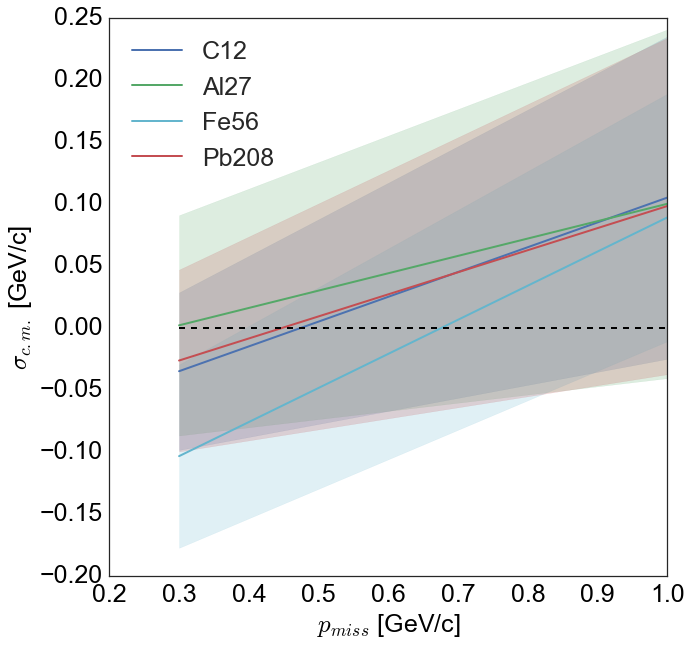

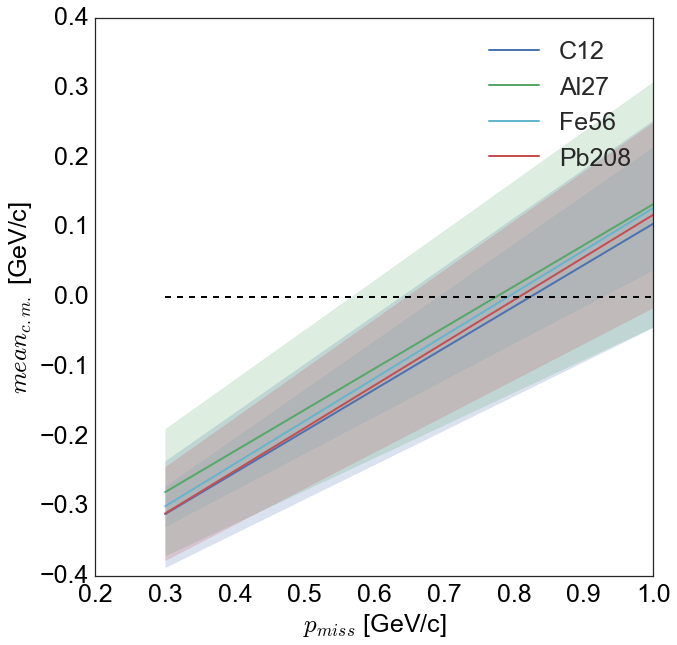

In [28]:
fig,ax=plt.subplots(figsize=(10,10))
for i,target,color in zip([0,1,2,3],['C12','Al27','Fe56','Pb208'],['b','g','c','r']):
    plt.plot(p_miss , sigma[i] , label=target , color=color,linewidth=2)
    plt.fill_between(p_miss , sigma_down[i] , sigma_up[i] , color=color, alpha=0.2)

plt.plot(p_miss,np.zeros(len(p_miss)),'--',linewidth=2,color='black')
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='$\\sigma_{c.m.}$ [GeV/c]')
plt.legend(fontsize=25,loc='upper left')


fig,ax=plt.subplots(figsize=(10,10))
for i,target,color in zip([0,1,2,3],['C12','Al27','Fe56','Pb208'],['b','g','c','r']):
    plt.plot(p_miss , mean[i] , label=target , color=color ,linewidth=2)
    plt.fill_between(p_miss , mean_down[i] , mean_up[i] , color=color , alpha=0.2)

plt.plot(p_miss,np.zeros(len(p_miss)),'--',linewidth=2,color='black')
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='$mean_{c.m.}$ [GeV/c]')
plt.legend(fontsize=25,loc='best')

